In [1]:
import torch
import torch.nn as nn
from transformers import AutoImageProcessor, AutoModelForImageClassification
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

import os
import sys
sys.path.append('../src/img/')
from img_utils import MaskedClassifier
from approx_ss_rate import sampling_algo
from explns import *

import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
expln_name = 'intgrad'

In [3]:
# get avg of each example

tau_all_examples = []

for i in range(1000):
    tau_all_i = torch.load(f'../saved_outputs/img/tau_all/{expln_name}/img_{i}.pt')
    tau_all_examples.append(torch.tensor(tau_all_i))

tau_all_examples = torch.stack(tau_all_examples)


In [4]:
tau_all_examples.shape

torch.Size([1000, 98])

In [5]:
torch.mean(tau_all_examples, dim=0).shape

torch.Size([98])

Text(0, 0.5, 'Stability rate')

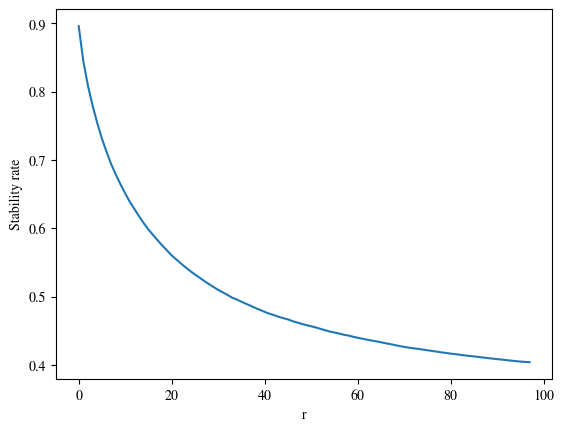

In [6]:
plt.plot(torch.mean(tau_all_examples, dim=0))
plt.xlabel('r')
plt.ylabel('Stability rate')

In [7]:
tau_all_examples.shape

torch.Size([1000, 98])

In [8]:
lambdas = [0.25, 0.5, 0.75, 1]
prop_all_curves = []
for threshold in lambdas:
    prop_all = [(tau_all_examples[:,i] > threshold).float().mean() for i in range(tau_all_examples.shape[1])]
    prop_all = torch.stack(prop_all)
    prop_all_curves.append(prop_all)

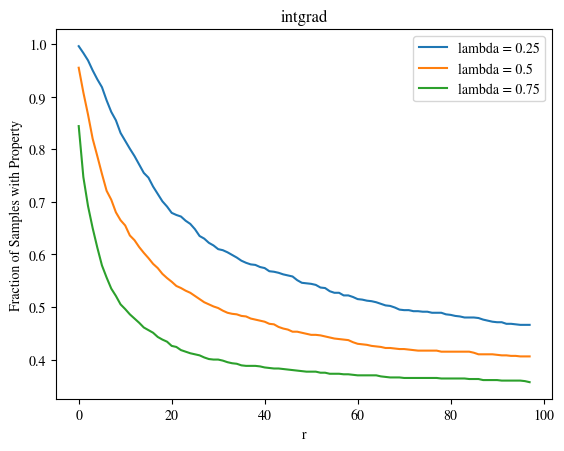

In [9]:
plt.plot(prop_all_curves[0])
plt.plot(prop_all_curves[1])
plt.plot(prop_all_curves[2])
# plt.plot(prop_all_curves[3])
plt.ylabel('Fraction of Samples with Property')
plt.xlabel('r')
plt.title(f'{expln_name}')
plt.legend(['lambda = 0.25', 'lambda = 0.5','lambda = 0.75'])#,'lambda = 1'])

plt.savefig(f'../figures/{expln_name}_experiment1', bbox_inches="tight")